In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
with open('mult_result.pkl', 'rb') as file:
    mult_result = pickle.load(file)

with open('seq_result.pkl', 'rb') as file:
    seq_result = pickle.load(file)

process_num = 4

for i in range(10):
    mult_result[i] = [[seq_result[i][j]] + mult_list for j, mult_list in enumerate(mult_result[i])]

measured_MP_time_list = []
measured_cumulative_time_list = []
for i in range(10):
    measured_MP_time = [sum([mult_result[i][j][k]for j in range(8)]) for k in range(process_num)]
    measured_MP_time_list.append(measured_MP_time)
    measured_cumulative_time = [sum([measured_MP_time_list[j][k] for j in range(i + 1)]) for k in range(process_num)]
    measured_cumulative_time_list.append(measured_cumulative_time)

In [3]:
process_nums = [i for i in range(1, process_num + 1)]

group0_accum_time = np.array(measured_cumulative_time_list[0])
group0_speed_up = group0_accum_time[0] / group0_accum_time
all_group_accum_time = np.array(measured_cumulative_time_list[-1])
all_group_speed_up = all_group_accum_time[0] / group0_accum_time

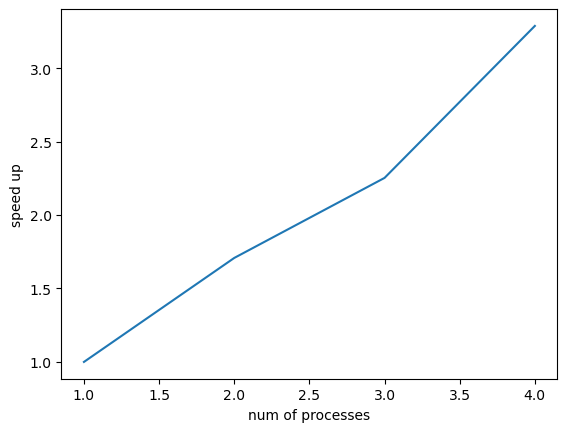

In [4]:
plt.plot(process_nums, group0_speed_up)
plt.xlabel('num of processes')
plt.ylabel('speed up')
plt.show()

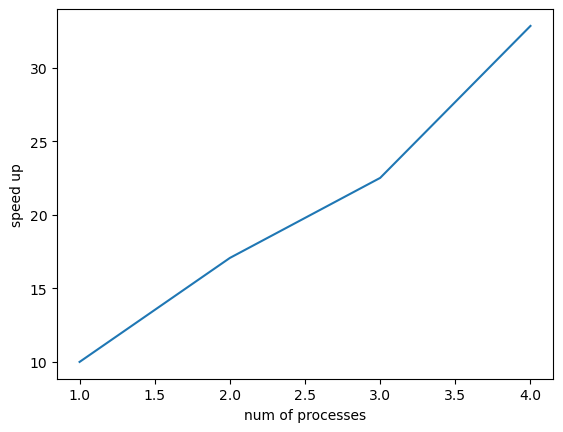

In [5]:
plt.plot(process_nums, all_group_speed_up)
plt.xlabel('num of processes')
plt.ylabel('speed up')
plt.show()